In [ ]:
!git clone https://github.com/ShubhamMishra1611/CNN_DOA.git

Cloning into 'CNN_DOA'...
remote: Enumerating objects: 55757, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 55757 (delta 17), reused 17 (delta 15), pack-reused 55734
Receiving objects: 100% (55757/55757), 370.48 MiB | 18.58 MiB/s, done.
Resolving deltas: 100% (1262/1262), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
%matplotlib inline
%matplotlib notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
%cd /content/CNN_DOA/DATASETS/MATLAB_TEST10

/content/CNN_DOA/DATASETS/MATLAB_TEST10


In [28]:
!python /content/visualize1.py

/content/visualize1.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
2024-04-25 13:57:32.376030: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 13:57:32.376111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 13:57:32.378041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 13:57:34.442094: W tenso

In [29]:
!python /content/visualize2.py

/content/visualize2.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
2024-04-25 13:58:02.852179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 13:58:02.852242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 13:58:02.853657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 13:58:04.280996: W tenso

# Visualization step by step

In [18]:
from utils import sorted_nicely
audiofiles = [str(file) for file in Path().glob('SA*.wav')]
audiofiles = sorted_nicely(audiofiles)

In [19]:
from extract_audio import extractAudiodata

sr = 16000
duration = 0.5

audioMatrix, sourceIDs, labels30, labels10 = extractAudiodata(audiofiles, sr*duration)

100%|██████████| 360/360 [00:03<00:00, 106.19it/s]


In [20]:
for i in range(0,10):
  ipd.display(ipd.Audio(audioMatrix[:,0,i], rate=sr))

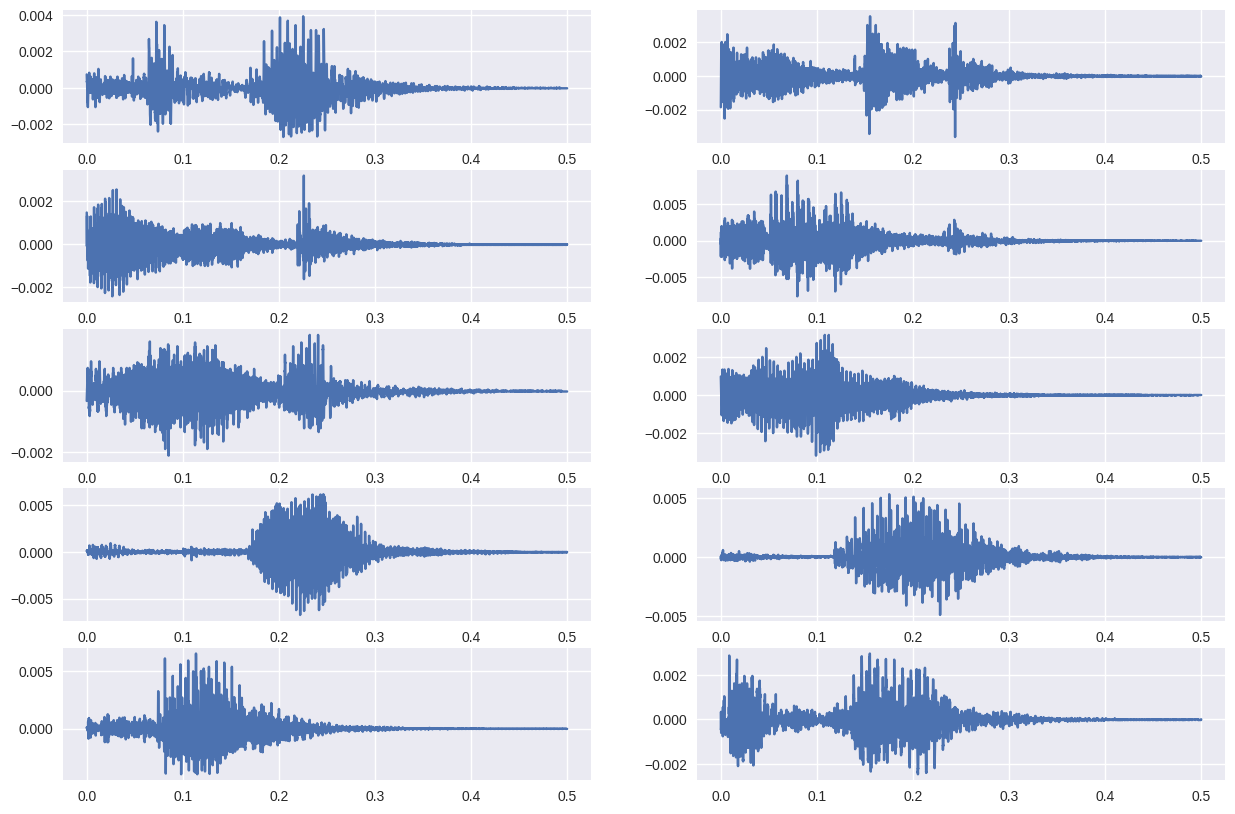

In [21]:
plt.figure(figsize=(15, 10))
time_axis = np.arange(0,sr*duration) / sr
for i in range(0, 10):
  plt.subplot(5, 2, i+1)
  plt.plot(time_axis, audioMatrix[:,0,i])

plt.show()

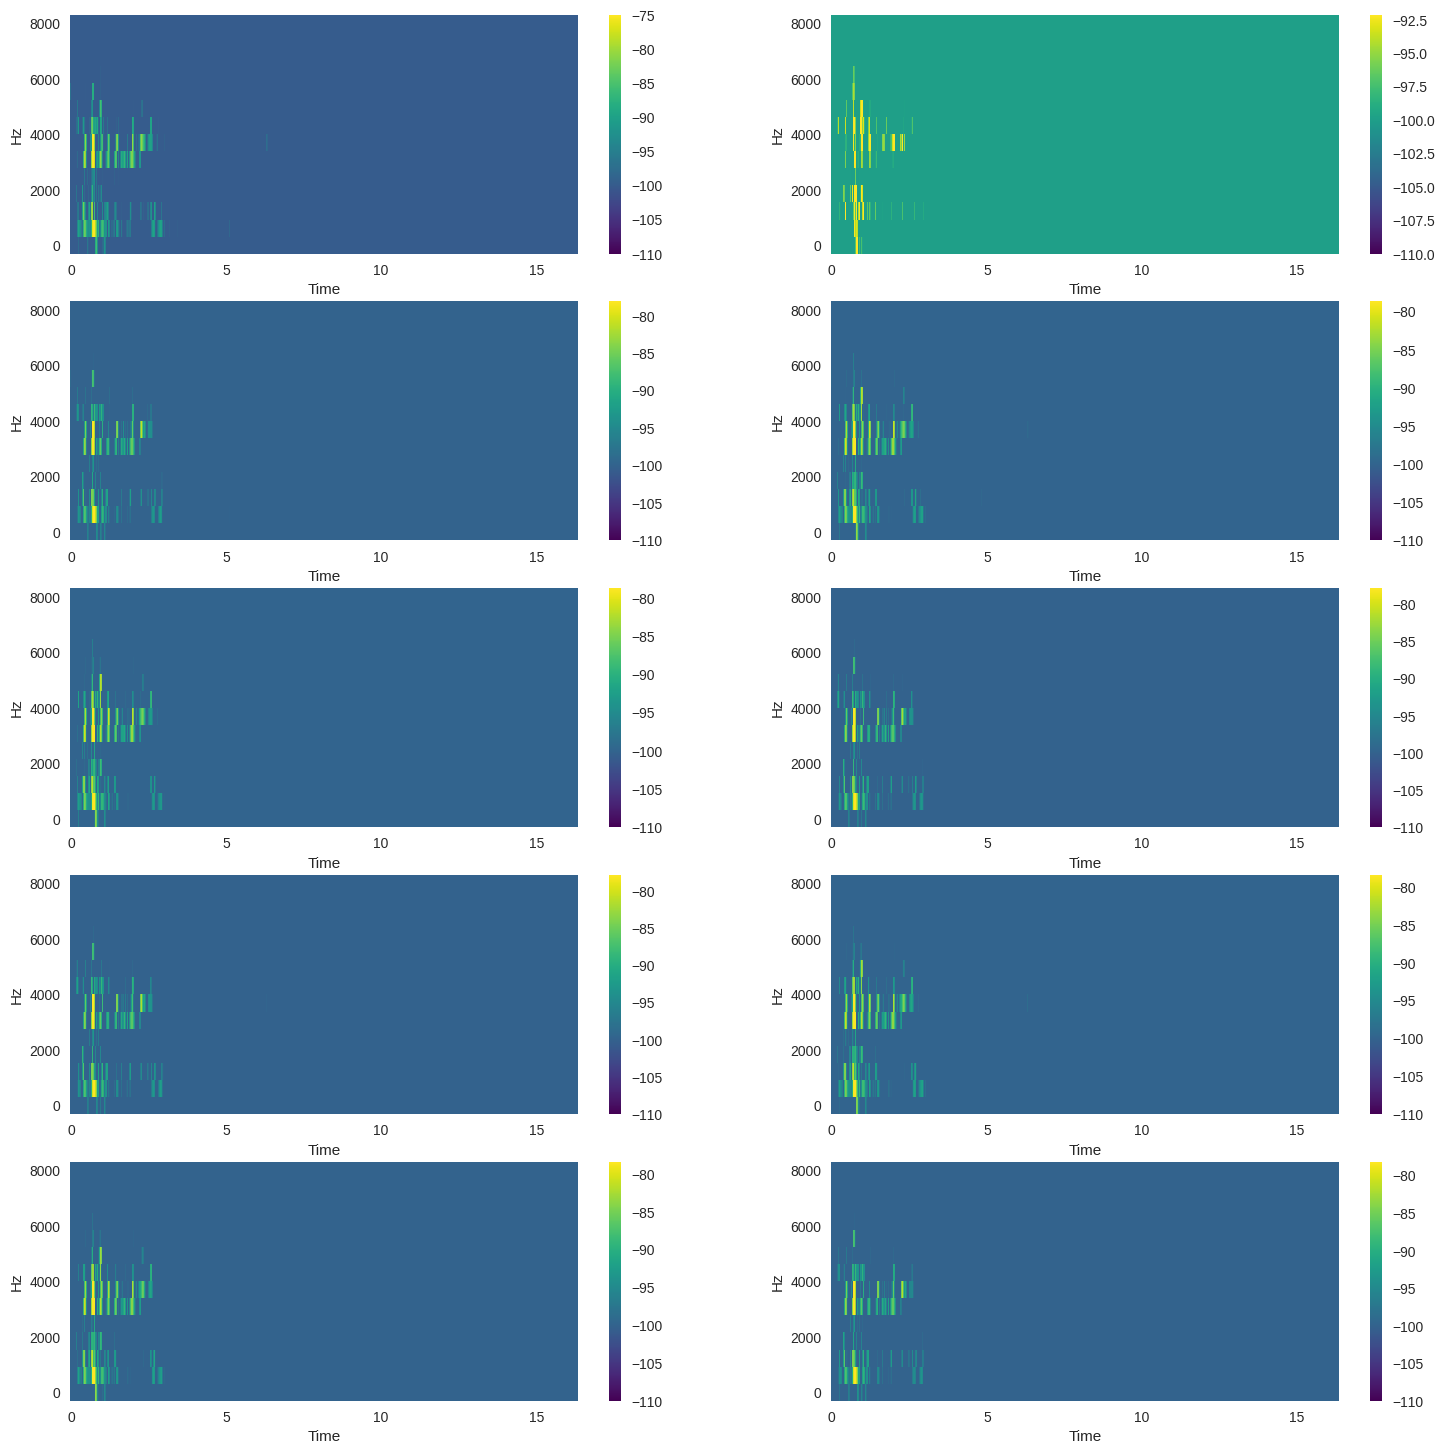

In [23]:
from calcs import featureExtractor2, computeSI

# Visualizing SI estimated for the first sentence
gamma = featureExtractor2(audioMatrix[:,:,0])

plt.figure(figsize=(18, 18))
for i in range(0, 10):
  plt.subplot(5, 2, i+1)
  # Converion to db is perfomed only for better visualization
  librosa.display.specshow(librosa.amplitude_to_db(gamma[:,:,i]), sr=sr, x_axis='time', y_axis='linear', cmap='viridis')
  plt.colorbar();
  plt.clim(np.max(librosa.amplitude_to_db(gamma[:,:,i])), np.min(librosa.amplitude_to_db(gamma[:,:,i])))
plt.show()